# Defender Analysis

## Setup

In [3]:
techniques_list = {
    'Model': ['ConfigurationInventory','AccessModeling','OrganizationMapping','AssetVulnerabilityEnumeration','DataInventory',
              'NetworkNodeInventory','SystemVulnerabilityAssessment','OperationalRiskAssessment','DataExchangeMapping', 'SystemDependencyMapping',
              'SoftwareInventory', 'OperationalDependencyMapping','ServiceDependencyMapping','NetworkTrafficPolicyMapping', 'HardwareComponentInventory','LogicalLinkMapping',
               'PhysicalLinkMapping'
              ],
    'Harden': ['CredentialRotation','UserAccountPermissions','MessageAuthentication','MessageEncryption','SoftwareUpdate','SystemConfigurationPermissions',
               'DomainTrustPolicy','StrongPasswordPolicy','CredentialTransmissionScoping','ApplicationConfigurationHardening','DeadCodeElimination','ExceptionHandlerPointerValidation',
                'PointerAuthentication','ProcessSegmentExecutionPrevention','SegmentAddressOffsetRandomization','StackFrameCanaryValidation','BiometricAuthentication','Certificate-basedAuthentication',
                'CertificatePinning','Multi-factorAuthentication','One-timePassword','TransferAgenAuthentication','BootloaderAuthentication','DiskEncryption','DriverLoadIntegrityChecking','FileEncryption',
                'LocalFilePermissions','RFShielding','TPMBootIntegrity'
               ],
    'Detect': ['IdentifierReputationAnalysis','DynamicAnalysis','SenderReputationAnalysis','URLAnalysis', 'LocalAccountMonitoring',
               'UserGeolocationLogonPatternAnalysis','OperatingSystemMonitoring','FileHashing', 'IdentifierActivityAnalysis', 'AuthenticationEventThresholding',
               'AuthorizationEventThresholding', 'ResourceAccessPatternAnalysis','AdministrativeNetworkActivityAnalysis','FileIntegrityMonitoring',
               'DatabaseQueryStringAnalysis','SenderMTAReputationAnalysis','ConnectionAttemptAnalysis','InboundSessionVolumeAnalysis', 'FirmwareBehaviorAnalysis',
               'ProtocolMetadataAnomalyDetection','FirmwareVerification','ProcessSpawnAnalysis','SystemCallAnalysis','ScriptExecutionAnalysis',
               'RemoteTerminalSessionDetection','DNSTrafficAnalysis','FileAccessPatternAnalysis','DomainAccountMonitoring','ProcessCodeSegmentVerification',
                'ShadowStackComparisons','Client-serverPayloadProfiling','NetworkTrafficCommunityDeviation','CredentialCompromiseScopeAnalysis','RPCTrafficAnalysis',
                'JobFunctionAccessPatternAnalysis','FileContentAnalysis','CertificateAnalysis','NetworkTrafficSignatureAnalysis','RelayPatternAnalysis','FirmwareEmbeddedMonitoringCode',
                'EmulatedFileAnalysis','HomoglyphDetection','ByteSequenceEmulation','FileCarving','IPCTrafficAnalysis','PerHostDownload-UploadRatioAnalysis',
                'IndirectBranchCallAnalysis','ProcessSelf-ModificationDetection','SessionDurationAnalysis','UserDataTransferAnalysis','WebSessionActivityAnalysis'
               ],
    'Isolate': ['Hardware-basedProcessIsolation','IOPortRestriction','Kernel-basedProcessIsolation','NetworkTrafficFiltering','ExecutableDenylisting','BroadcastDomainIsolation','ExecutableAllowlisting','DNSDenylisting','DNSAllowlisting','EncryptedTunnels'],
    'Deceive': ['ConnectedHoneynet','IntegratedHoneynet','StandaloneHoneynet','DecoyFile','DecoyNetworkResource','DecoyPersona','DecoyPublicRelease','DecoySessionToken','DecoyUserCredential'],
    'Evict': ['AccountLocking','FileRemoval','ProcessTermination','HostShutdown','CredentialRevoking','AuthenticationCacheInvalidation','ProcessSuspension','SessionTermination','DiskFormatting','DNSCacheEviction','DomainRegistrationTakedown','RegistryKeyDeletion'],
    'Restore': ['ReissueCredential','RestoreNetworkAccess','RestoreFile','RestoreUserAccountAccess','RestoreDiskImage','RestoreConfiguration','RestoreDatabase','RestoreSoftware']
    }

### Import Statements + Install Kaggle

In [4]:
import pandas as pd
import math
import ast
import matplotlib.pyplot as plt
import numpy as np
import os
import zipfile
import requests
!pip install kaggle


### Download Dataset from Kaggle

In [5]:

# Step 2: Define the dataset identifier
dataset_identifier = 'synkorsink/playbook-d3fend'  # Replace with your dataset identifier
 
# Step 3: Create a directory to store the dataset
os.makedirs('kaggle_dataset', exist_ok=True)
 
# Step 4: Download the dataset
!kaggle datasets download -d {dataset_identifier} -p kaggle_dataset --force
 
# Step 5: List all downloaded files
downloaded_files = os.listdir('kaggle_dataset')
 
# Step 6: Extract all zip files in the directory
for file_name in downloaded_files:
    if file_name.endswith('.zip'):
        with zipfile.ZipFile(os.path.join('kaggle_dataset', file_name), 'r') as zip_ref:
            zip_ref.extractall('kaggle_dataset')
 

# Save the DataFrame to a CSV file
#df_final.to_csv('playbook_d3fend_mapping.csv', index=False)

Dataset URL: https://www.kaggle.com/datasets/synkorsink/playbook-d3fend
License(s): unknown




  0%|          | 0.00/199k [00:00<?, ?B/s]
100%|##########| 199k/199k [00:00<00:00, 486kB/s]
100%|##########| 199k/199k [00:00<00:00, 485kB/s]


In [17]:
df_def = pd.read_csv('kaggle_dataset/playbook_d3fend_mapping.csv', delimiter=';')
#df_final.head()

### Load playbook dataset from GIthub

In [19]:
playbook_url = 'https://raw.githubusercontent.com/luduslibrum/awesome-playbooks/refs/heads/main/analysis/coding/playbooks.csv'
local_file_url = "playbooks.csv"
response = requests.get(playbook_url)
if response.status_code == 200:
    with open(local_file_url, 'wb') as file:
        file.write(response.content)
    print(f"File downloaded successfully as {local_file_url}")
else:
    print(f"Failed to download file. Status code: {response.status_code}")

df_playbooks = pd.read_csv('playbooks.csv')
df_playbooks.head()

File downloaded successfully as playbooks.csv


,index,id,vendor,playbook_name,playbook_description,tags,steps,actuator,step_types,step_names
0,0,p1,FortiSOAR,Action (Type All) - Block Indicators,Blocks all types of indicators on the firewall...,"['Subroutine', 'Mitigation']",10,"['', '', '', '', '', '', '', '', '', 'cyops_ut...","['Start', 'Configuration', 'Condition', 'Playb...","['Start', 'Configuration', 'Check Type of Indi..."
1,1,p2,FortiSOAR,Action - Asset Mitigation,Carries out a sequence of processes such as Cl...,"['ManualAction', 'Mitigation']",17,"['', '', '', '', '', '', '', '', '', '', '', '...","['Manual task', 'Manual task', 'User decision'...","['Note about AV Scan', 'Add Note', 'Take Snaps..."
2,2,p3,FortiSOAR,Action - Domain - Block (Indicator),Blocks the indicators of type 'Domain' on the ...,"['ManualAction', 'Mitigation']",6,"['', '', '', '', '', '']","['Start', 'API call', 'Manual task', 'API call...","['Start', 'Mark as TBD', 'Add note to Indicato..."
3,3,p4,FortiSOAR,Action - Domain - Block (Specified by User),Creates an indicator for the domain name speci...,"['ManualAction', 'Mitigation']",4,"['', '', '', 'cyops_utilities']","['Playbook execution', 'Start', 'Manual task',...","['Block Domain', 'Start', 'Create Domain Indic..."
4,4,p5,FortiSOAR,Action - Domain - Unblock (Indicator),Unblocks the indicators of type 'Domain' on th...,"['ManualAction', 'Mitigation']",6,"['', '', '', '', '', '']","['Manual task', 'Start', 'API call', 'User dec...","['Add note to Indicator', 'Start', 'Mark as Un..."


### Merge vendors playbooks with mapping playbooks

In [21]:
vendor_df = df_playbooks[['id','vendor', 'tags', 'steps']]

df_big = df_def[(df_def['steps'] >= 10) & (df_def['steps'] < 20)]
df_small = df_def[df_def['steps'] < 10] 
df_very_big =  df_def[df_def['steps'] >= 20] 

df_def.head()

,playbook_id,techniques,pb_name,pb_description,techniques_clean,techniques_count,steps,ratio_t_s,artifacts,artifacts_count,tactics,tactics_count,ratio_a_s
0,p122,"['c:CTI_Input', 'IdentifierReputationAnalysis'...",Indicator (File MD5) - Get Latest Reputation,Retrieves the reputation of indicators of type...,"['IdentifierReputationAnalysis', 'IdentifierAn...",2,11,0.181818,[],0,['Detect'],1,0.000000
1,p123,"['c:CTI_Input', 'FileAnalysis', 'IdentifierRep...",Indicator (File) - Get Latest Reputation,Uploads a file to a sandbox and then retrieves...,"['FileAnalysis', 'IdentifierReputationAnalysis...",4,1,4.000000,['Identifier'],1,['Detect'],1,1.000000
2,p124,"['IdentifierReputationAnalysis', 'IdentifierAn...",Indicator (IP Address) - Get Latest Reputation,Retrieves the reputation of indicators of type...,"['IdentifierReputationAnalysis', 'IdentifierAn...",2,5,0.400000,"['Identifier', 'Identifier', 'Identifier', 'Id...",5,['Detect'],1,1.000000
3,p125,"['c:CTI_Input', 'IdentifierReputationAnalysis'...",Indicator (Manual Trigger) - Get Latest Reputa...,Retrieves the reputation of indicators using c...,"['IdentifierReputationAnalysis', 'IdentifierAn...",2,3,0.666667,[],0,['Detect'],1,0.000000
4,p126,"['c:CTI_Input', 'IdentifierReputationAnalysis'...",Indicator (Type All) - Get Latest Reputation,Based on the type of indicator this playbook ...,"['IdentifierReputationAnalysis', 'IdentifierAn...",2,7,0.285714,"['Identifier', 'Identifier', 'Identifier', 'Id...",6,['Detect'],1,0.857143


## Total Numbers

In [23]:
print(f'Playbook Number (Origin):{len(df_playbooks)}')
print(f'Playbook Number(Categorized): {len(df_def)}')
print(f'Playbooks (Uncategorized = c:misc): {len(df_playbooks) -len(df_def) }')
print(f'Playbooks(Only Custom):{df_def[df_def['tactics_count'] == 0].shape[0]}')
print(f'Playbooks(Total not D3FEND):{df_def[df_def['tactics_count'] == 0].shape[0]+len(df_playbooks) -len(df_def) }')
print(f'Playbooks(D3FEND):{df_def[df_def['tactics_count'] > 0].shape[0]}')
print(f'Total Tactics = D3FEND Playbooks: {df_def['tactics_count'].sum()}')
print(f'Total Techniques: {df_def['techniques_count'].sum()}')

sum = 0 
for index, value in df_def.iterrows():
    techniques = value['techniques_clean']
    techniques_under = []
    for t in techniques:
        for ta in techniques_list:
            if t in techniques_list[ta]:
                sum += 1
                techniques_under.append(t)
    df_def.at[index, 'techniques_count_under'] = len(techniques_under)

df_def.head()
print(df_def['techniques_count_under'].sum())               

Playbook Number (Origin):1221
Playbook Number(Categorized): 1221
Playbooks (Uncategorized = c:misc): 0
Playbooks(Only Custom):369
Playbooks(Total not D3FEND):369
Playbooks(D3FEND):852
Total Tactics = D3FEND Playbooks: 1046
Total Techniques: 2721
0.0


## Vendor Coverage

['FortiSOAR', 'Rapid7', 'Resolve', 'Splunk', 'XSOAR']
{'Model': ['AccessModeling', 'SystemDependencyMapping', 'SoftwareInventory', 'HardwareComponentInventory', 'NetworkNodeInventory', 'ConfigurationInventory', 'AssetVulnerabilityEnumeration', 'SystemVulnerabilityAssessment', 'OperationalRiskAssessment', 'DataInventory', 'OrganizationMapping', 'OperationalDependencyMapping', 'ServiceDependencyMapping', 'NetworkTrafficPolicyMapping', 'DataExchangeMapping'], 'Harden': ['SoftwareUpdate', 'CredentialRotation', 'UserAccountPermissions', 'SystemConfigurationPermissions', 'DomainTrustPolicy', 'StrongPasswordPolicy', 'CredentialTransmissionScoping', 'ApplicationConfigurationHardening', 'MessageEncryption'], 'Detect': ['IdentifierReputationAnalysis', 'URLAnalysis', 'SenderReputationAnalysis', 'DynamicAnalysis', 'IdentifierActivityAnalysis', 'FileHashing', 'LocalAccountMonitoring', 'UserGeolocationLogonPatternAnalysis', 'OperatingSystemMonitoring', 'AuthenticationEventThresholding', 'Authorizati

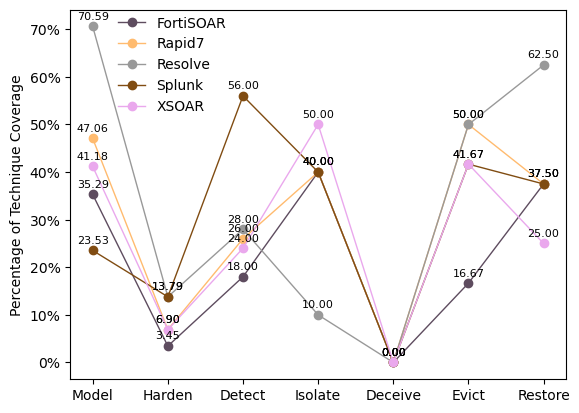

<Figure size 1500x1200 with 0 Axes>

In [70]:
# vendor_df
# filtered_only_upper_unsorted
# filtered_only_under
import random
from scipy.interpolate import make_interp_spline
import matplotlib.ticker as mtick




barchart_tactics = ['Model','Harden','Detect','Isolate','Deceive','Evict','Restore']
vendor_list = []
vendor_excluded = ['Catalyst','IACD','OasisOpen', 'Chronicle','Tines','Demisto','LogicHub','Shuffle','ThreatConnect','CISA']
n = len(barchart_tactics)


df_vendor_playbooks = df_def[['playbook_id', 'techniques_clean']]
df_vendor_playbooks.columns = ['id','mapping']
#pd.read_csv('mapping.csv', header=None, names=['id','mapping'])

#df_vendor_playbooks['mapping'] = df_vendor_playbooks['mapping'].apply(ast.literal_eval)


merged_df = pd.merge(vendor_df, df_vendor_playbooks, on='id')
# print(merged_df.head())
index = np.arange(n)

for vendor in vendor_df['vendor']:
    if vendor not in vendor_list:
        if vendor not in vendor_excluded:
            vendor_list.append(vendor)
print(vendor_list)

# Function to generate random colors
def get_random_color(number):
    colors = ['#5e4c5f','#ffbb6f','#999999','#804c12','#eaa8ed']
    return colors[number]

# Keep track of used colors
used_colors = set()

bar_width = 0.35
# max coverage numeric value based on the under techniques
max_coverage = {'Model': 17, 'Harden': 29, 'Detect': 50, 'Isolate': 10, 'Deceive': 9, 'Evict': 12, 'Restore': 8}

coverage_kum = {'Model': [], 'Harden': [], 'Detect': [], 'Isolate': [], 'Deceive': [], 'Evict': [], 'Restore': []}
percentages_kum = []
color_start_index = 0

for vendor in vendor_list:
    color = get_random_color(color_start_index)
    color_start_index += 1
    df_vendor = merged_df[merged_df['vendor'] == vendor]
    # 1: List for the values
    percentage = []
    # 2: Iterate through the tactics and calculate coverage for the vendor
    for tactic in barchart_tactics:
        max_list = []
        matched_techniques = []
        data_value_number = 0
        for x in techniques_list[tactic]:
            max_list.append(x)
        for index, row in df_vendor.iterrows():
            mappings = row['mapping']
            mappings = ast.literal_eval(mappings)
            for map in mappings:
                if map in max_list:
                    if map not in matched_techniques:
                        matched_techniques.append(map)
                        data_value_number += 1
                    if map not in coverage_kum[tactic]:
                        coverage_kum[tactic].append(map)
  
        data_value_percentage = (data_value_number / max_coverage[tactic]) * 100
        percentage.append(data_value_percentage)
   
    # 3: Plot the bar for the vendor
    #    --> plt.bar(index, values1, bar_width, label='Value Set 1')
    label_x = f'{vendor}'
    x_numeric = np.arange(len(barchart_tactics))
    x_smooth = np.linspace(x_numeric.min(), x_numeric.max(), 300)
    spl = make_interp_spline(x_numeric, percentage, k=2)  # k=3 for cubic spline
   # print(percentage)
    if vendor == "XSOAR":
        y_smooth = spl(x_smooth)
       # y_smooth = np.clip(y_smooth, 0,  0.5)
    else:
        y_smooth = spl(x_smooth)
        y_smooth = np.clip(y_smooth, 0,  0.88)
    # y_smooth = np.array(percentage)
    plt.plot(x_numeric, percentage, label=vendor, color=color, linewidth=1, marker='o')
    plt.xticks(x_numeric, barchart_tactics)
    
    plt.legend(loc='right',bbox_to_anchor=(0.34, 0.85), frameon=False)
   # plt.plot(x_smooth, y_smooth, label=vendor, color=color, linewidth=1, marker='o')
   # plt.xticks(x_numeric, barchart_tactics)
   # plt.legend(loc='right',bbox_to_anchor=(1.27, 0.15))
    for i, value in enumerate(percentage):
        plt.annotate(f'{value:.2f}', (x_numeric[i], percentage[i]), 
                     textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='black')
print(coverage_kum)
# Plot the kumulative plot across the vendors

for tactic in coverage_kum:
    percentages_kum.append((len(coverage_kum[tactic])/max_coverage[tactic])*100)
  # print(len(coverage_kum[tactic]))
   # print(max_coverage[tactic])
x_numeric_kum = np.arange(len(barchart_tactics))
x_smooth_kum = np.linspace(x_numeric_kum.min(), x_numeric_kum.max(), 300)
print(percentages_kum)
#spl_kum = make_interp_spline(x_numeric_kum, percentages_kum, k=2)  # k=3 for cubic spline
#y_smooth_kum = spl_kum(x_smooth_kum)
#y_smooth_kum = np.clip(y_smooth_kum, 0,  1.1)

#plt.xlabel('Mitre D3FEND Tactics')
plt.ylabel('Percentage of Technique Coverage')
# Set y-axis to display percentages
ax = plt.gca()  # Get current axis
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # If your data is in 0-1 range
# If your data is in 0-100 range, use:
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
#plt.title('The Coverage of Playbook Vendors over Mitre D3FEND Tactics')
plt.savefig("distribution_of_playbooks_lines.pdf", format='pdf')
plt.figure(figsize=(15,12))

plt.show()

## Barchart Diagram Tactics

   Tactics  amount
0    Model     153
1   Harden      35
2   Detect     495
3  Isolate     183
4  Deceive       0
5    Evict     101
6  Restore      79
1046
15.920915712799166
3.6420395421436007
51.508844953173785
19.042663891779394
0.0
10.509885535900104
8.220603537981269


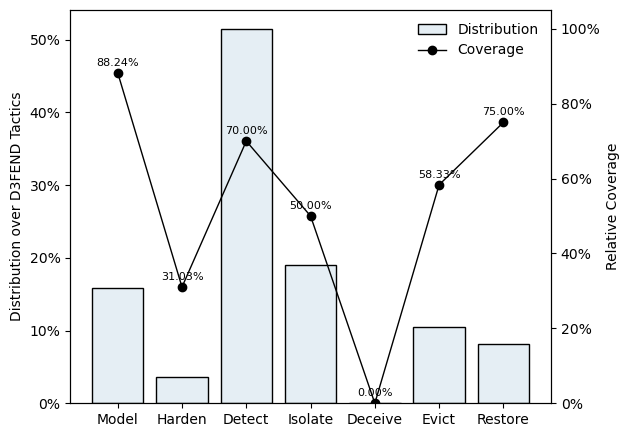

In [33]:
from matplotlib.ticker import PercentFormatter

dataframe_playbook_count = {
    'Model':0, 'Harden':0, 'Detect':0, 'Isolate':0, 'Deceive':0, 'Evict':0, 'Restore':0  # Column with strings
}
colors = [(0.0, 0.3569, 0.5804, 0.1),(0.0, 0.3569, 0.5804, 0.1),(0.0, 0.3569, 0.5804, 0.1),(0.0, 0.3569, 0.5804, 0.1),(0.0, 0.3569, 0.5804, 0.1),
          (0.0, 0.3569, 0.5804, 0.1),(0.0, 0.3569, 0.5804, 0.1),(0.0, 0.3569, 0.5804, 0.1)]

coverage = [0.8823529411764706, 0.3103448275862069, 0.7, 0.5, 0.0, 0.5833333333333334, 0.75]
coverage_perc = [88.23529411764706, 31.03448275862069, 70.0, 50.0, 0.0, 58.333333333333336, 75.0]

sum = 0
for index, value in df_def.iterrows():
    tactics_i = value['tactics']
    tactics_i = ast.literal_eval(tactics_i)
    for t in tactics_i:
        dataframe_playbook_count[t] +=1
        sum += 1
# Transform to DataFrame
df_tactics = pd.DataFrame.from_dict(dataframe_playbook_count, orient='index', columns=['amount']).reset_index()
df_tactics = df_tactics.rename(columns={'index': 'Tactics'})
print(df_tactics)
print(sum)

for index, value in df_tactics.iterrows():  
    df_tactics.loc[index, 'percentage_column'] = (value['amount'] / 961) * 100
    print(df_tactics.loc[index, 'percentage_column'])
    
fig, ax1 = plt.subplots()
ax1.bar(df_tactics['Tactics'],df_tactics['percentage_column'],label='Distribution', color=colors, edgecolor='black',)
#ax1.set_xlabel('D3FEND Tactics (no Tactic = None extracted)')
ax1.set_ylabel('Distribution over D3FEND Tactics', color='black')
# Format y-axis of ax1 as percentages
ax1.yaxis.set_major_formatter(PercentFormatter(decimals=0))

#ax1.legend(loc='upper left', bbox_to_anchor=(0, 1.02))
# Create a second y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Relative Coverage of the D3FEND Tactic', color='black')
ax2.set_ylim(0, 105)  # Set the limits of the second y-axis
plt.xlabel('D3FEND Tactics (Others = None extracted)')
plt.ylabel('Relative Coverage')
ax2.plot(x_numeric, coverage_perc, label='Coverage', color='black', linewidth=1, marker='o')

for i, value in enumerate(coverage_perc):
    ax2.annotate(f'{value:.2f}%', (x_numeric[i], coverage_perc[i]), 
                 textcoords="offset points", xytext=(0,5), ha='center', fontsize=8, color='black')

# Combine legends from both ax1 and ax2
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

ax2.legend(handles + handles2, labels + labels2,loc='upper right', bbox_to_anchor=(1, 1), frameon=False)
ax2.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.savefig("distribution_of_playbooks.pdf", format='pdf', bbox_inches='tight')
fig.tight_layout()
fig.subplots_adjust(top=0.9)
# 1396 Techniques insgesamt
# 1217 -909 = 308 ohne tactic
# 71 techniques
# d.h. gesamt techniques = 1088
# Detect % = 
plt.show()

In [39]:
focus_points = {'IdentifierReputationAnalysis':0,'IdentifierActivityAnalysis':0,'AssetVulnerabilityEnumeration':0,'OperationalRiskAssessment':0,
               'CredentialRotation':0,'SoftwareUpdate':0,'NetworkTrafficFiltering':0,'BroadcastDomainIsolation':0,'FileRemoval':0,'AccountLocking':0
               ,'RestoreNetworkAccess':0,'RestoreUserAccountAccess':0}

for index, value in df_def.iterrows():
    techniques = value['techniques_clean']
    techniques = ast.literal_eval(techniques)
    for i in techniques:
        if i in focus_points:
            focus_points[i] +=1

print(focus_points)


{'IdentifierReputationAnalysis': 314, 'IdentifierActivityAnalysis': 68, 'AssetVulnerabilityEnumeration': 65, 'OperationalRiskAssessment': 36, 'CredentialRotation': 16, 'SoftwareUpdate': 8, 'NetworkTrafficFiltering': 127, 'BroadcastDomainIsolation': 47, 'FileRemoval': 41, 'AccountLocking': 33, 'RestoreNetworkAccess': 41, 'RestoreUserAccountAccess': 15}


## Statistics

In [41]:
# Arithmetische Mittel der Steps
steps_mean = df_def['steps'].mean(skipna=False)
steps_median = df_def['steps'].median(skipna=False)
print(f'Mean Playbook Steps: {steps_mean}')
print(f'Median Playbook Steps: {steps_median}')
print(" ")
tactics_mean = df_def['tactics_count'].mean(skipna=False)
tactics_median = df_def['tactics_count'].median(skipna=False)
tactics_variance = df_def['tactics_count'].var(skipna=False)
print(f'Mean Playbook Tactics: {tactics_mean}')
print(f'Median Playbook Tactics: {tactics_median}')
print(f'Variance Playbook Tactics: {tactics_variance}')
print(" ")
techniques_mean = df_def['techniques_count'].mean(skipna=False)
techniques_median = df_def['techniques_count'].median(skipna=False)
techniques_variance = df_def['techniques_count'].var(skipna=False)
print(f'Mean Playbook techniques: {techniques_mean}')
print(f'Median Playbook techniques: {techniques_median}')
print(f'Variance Playbook techniques: {techniques_variance}')
print(" ")
techniques_simple_mean = df_def['techniques_count_under'].mean(skipna=False)
print(f'Mean Playbook techniques (Under): {techniques_simple_mean}')


artifacts_mean = df_def['artifacts_count'].mean(skipna=False)
artifacts_median = df_def['artifacts_count'].median(skipna=False)
artifacts_ratio = df_def['ratio_a_s'].mean(skipna=False)
print(f'Mean artifacts: {artifacts_mean}')
print(f'Median artifacts: {artifacts_median}')
print(f'Ratio artifacts: {artifacts_ratio}')
print(" ")


filtered_df = df_def[df_def['techniques_count'] > 1]

ratio_t_s_mean = filtered_df['ratio_t_s'].mean(skipna=False)
ratio_t_s_med = filtered_df['ratio_t_s'].median(skipna=False)
print(f'Mean Techniques per Steps: {ratio_t_s_mean}')
print(f'Median Techniques per Steps: {ratio_t_s_med}')



Mean Playbook Steps: 8.324324324324325
Median Playbook Steps: 5.0
 
Mean Playbook Tactics: 0.8566748566748567
Median Playbook Tactics: 1.0
Variance Playbook Tactics: 0.485178770424672
 
Mean Playbook techniques: 2.2285012285012287
Median Playbook techniques: 2.0
Variance Playbook techniques: 3.468236194465702
 
Mean Playbook techniques (Under): 0.0
Mean artifacts: 5.687960687960688
Median artifacts: 3.0
Ratio artifacts: 0.712575054779911
 
Mean Techniques per Steps: 0.904893827135457
Median Techniques per Steps: 0.4444444444444444


### Relation of Playbook Steps and Techniques

In [44]:
# Prozentzahlen der artifacts

gesamtzahl_artifacts = 6376
print(gesamtzahl_artifacts)
identifier_percentage = 406/gesamtzahl_artifacts
DI_b_perc = 329/gesamtzahl_artifacts
DI = 198/gesamtzahl_artifacts
NN = 108/gesamtzahl_artifacts
file_perc = 77/gesamtzahl_artifacts
ids = 70/gesamtzahl_artifacts
network = 48/gesamtzahl_artifacts
User = 35/gesamtzahl_artifacts
User_account = 23/gesamtzahl_artifacts
Metadata = 20/gesamtzahl_artifacts
print(f'Identifier: {identifier_percentage}')
print(f'D.I.Bearer: {DI_b_perc}')
print(f'D.I: {DI}')
print(f'Network Node: {NN}')
print(f'File: {file_perc}')
print(f'IDS: {ids}')
print(f'Network: {network}')
print(f'User: {User}')
print(f'User Account: {User_account}')
print(f'Metadata: {Metadata}')

6376
Identifier: 0.0636762860727729
D.I.Bearer: 0.05159974905897114
D.I: 0.031053952321204517
Network Node: 0.016938519447929738
File: 0.012076537013801757
IDS: 0.010978670012547051
Network: 0.0075282308657465494
User: 0.005489335006273526
User Account: 0.0036072772898368883
Metadata: 0.003136762860727729


In [48]:
calculations = {"Model":[],"Harden":[],"Detect":[],"Isolate":[],"Deceive":[],"Evict":[],"Restore":[]}

for index, value in df_def.iterrows():
    tactics = value['tactics']
    tactics = ast.literal_eval(tactics)
    artifacts = value['artifacts']
    artifacts = ast.literal_eval(artifacts)
    #print(artifacts)
    for t in tactics:
        for a in artifacts:
            calculations[t].append(a)

sum = 0
for i in calculations:
    print(i)
    sum += len(calculations[i])

print(sum)

Model
Harden
Detect
Isolate
Deceive
Evict
Restore
6966


In [50]:
calculations_artifact = {"Model":[],"Harden":[],"Detect":[],"Isolate":[],"Deceive":[],"Evict":[],"Restore":[]}
artifacts_perc = {"Identifier":{"Model":0,"Harden":0,"Detect":0,"Isolate":0,"Deceive":0,"Evict":0,"Restore":0},
                  "Digital Information Bearer":{"Model":0,"Harden":0,"Detect":0,"Isolate":0,"Deceive":0,"Evict":0,"Restore":0},
                  "Digital Information":{"Model":0,"Harden":0,"Detect":0,"Isolate":0,"Deceive":0,"Evict":0,"Restore":0},
             "Network Node":{"Model":0,"Harden":0,"Detect":0,"Isolate":0,"Deceive":0,"Evict":0,"Restore":0},"File":{"Model":0,"Harden":0,"Detect":0,"Isolate":0,"Deceive":0,"Evict":0,"Restore":0},
                  "Intrusion Detection System":{"Model":0,"Harden":0,"Detect":0,"Isolate":0,"Deceive":0,"Evict":0,"Restore":0},"Network":{"Model":0,"Harden":0,"Detect":0,"Isolate":0,"Deceive":0,"Evict":0,"Restore":0},
            "User":{"Model":0,"Harden":0,"Detect":0,"Isolate":0,"Deceive":0,"Evict":0,"Restore":0},"User Account":{"Model":0,"Harden":0,"Detect":0,"Isolate":0,"Deceive":0,"Evict":0,"Restore":0},"Metadata":{"Model":0,"Harden":0,"Detect":0,"Isolate":0,"Deceive":0,"Evict":0,"Restore":0}}

other_sum = 0
for index, value in df_def.iterrows():
    tactics = value['tactics']
    tactics = ast.literal_eval(tactics)
    artifacts = value['artifacts']
    artifacts = ast.literal_eval(artifacts)
    for a in artifacts:
        if a in artifacts_perc:
            for t in tactics:
                artifacts_perc[a][t] += 1
        else:
            other_sum += 1
print(artifacts_perc)

final_sum = 0
for ar in artifacts_perc:
    for tac in artifacts_perc[ar]:
        artifacts_perc[ar][tac]
        final_sum += artifacts_perc[ar][tac]
#print(final_sum)
#print(other_sum)
print(final_sum + other_sum)

#  Digital Information Bearer &  0.213 & 0.052 & 0.365 & 0.207 & 0.003 & 0.075 & 0.085 & XX.X\%

for art in artifacts_perc:
    artifacts_total = 6469
    result_latex = '\\textbf{x} & ' + art
    sum_artifact_row = 0 
    for tactic in artifacts_perc[art]:
        sum_artifact_row += artifacts_perc[art][tactic]
    percentage_artifact = round(sum_artifact_row/artifacts_total, 4)
   # print(percentage_artifact)
    for tactic in artifacts_perc[art]:
        number_absolut = artifacts_perc[art][tactic]
        result_latex = result_latex +  '& ' + str(round(number_absolut/artifacts_total, 4))
    
    result_latex += '&' + str(percentage_artifact) + "\\" + "\\"
    print(result_latex)

        

{'Identifier': {'Model': 102, 'Harden': 19, 'Detect': 1199, 'Isolate': 424, 'Deceive': 0, 'Evict': 106, 'Restore': 56}, 'Digital Information Bearer': {'Model': 165, 'Harden': 58, 'Detect': 300, 'Isolate': 201, 'Deceive': 0, 'Evict': 159, 'Restore': 96}, 'Digital Information': {'Model': 159, 'Harden': 21, 'Detect': 261, 'Isolate': 41, 'Deceive': 0, 'Evict': 32, 'Restore': 12}, 'Network Node': {'Model': 113, 'Harden': 32, 'Detect': 146, 'Isolate': 146, 'Deceive': 0, 'Evict': 55, 'Restore': 93}, 'File': {'Model': 30, 'Harden': 1, 'Detect': 172, 'Isolate': 69, 'Deceive': 0, 'Evict': 58, 'Restore': 13}, 'Intrusion Detection System': {'Model': 46, 'Harden': 21, 'Detect': 157, 'Isolate': 56, 'Deceive': 0, 'Evict': 25, 'Restore': 11}, 'Network': {'Model': 6, 'Harden': 3, 'Detect': 94, 'Isolate': 139, 'Deceive': 0, 'Evict': 12, 'Restore': 32}, 'User': {'Model': 17, 'Harden': 16, 'Detect': 79, 'Isolate': 18, 'Deceive': 0, 'Evict': 60, 'Restore': 27}, 'User Account': {'Model': 13, 'Harden': 18, '

In [52]:
print(len(df_big))
print(f'Mean Artifacts in bin playbooks: {df_big['techniques_count'].mean(skipna= False)}')
print(f'Mean Artifacts in small playbooks: {df_small['techniques_count'].mean(skipna= False)}')
print(f'Mean Artifacts in small playbooks: {df_very_big['techniques_count'].median(skipna= False)}')
print(f'Mean Artifacts in all playbooks: {df_def['techniques_count'].median(skipna= False)}')


print(len(df_small))

269
Mean Artifacts in bin playbooks: 2.486988847583643
Mean Artifacts in small playbooks: 2.0318396226415096
Mean Artifacts in small playbooks: 3.0
Mean Artifacts in all playbooks: 2.0
848


## Customs

In [64]:
customs = {}
for index, value in df_def.iterrows():
    techniques = value['techniques']
    techniques = ast.literal_eval(techniques)
    for t in techniques:
        #print(t[:])
        if t.startswith('c:'):
            if t in customs:
                customs[t] += 1
            else:
                customs[t] = 1

#print(customs)
for c in customs:
    print(f'Custom: {c[2:]}, Amount: {customs[c]}')

Custom: CTI_Input, Amount: 91
Custom: AdditionalTask, Amount: 202
Custom: IncidentHandlingManagement, Amount: 55
Custom: NotifyingTask, Amount: 34
Custom: HistoricalDataAnalysis, Amount: 5
Custom: IncidentScoring, Amount: 12
Custom: Compliance, Amount: 1
Custom: SystemTest, Amount: 25
Custom: IncidentDocumentation, Amount: 2
Custom: IncidentResponseProcess, Amount: 1
Custom: IncidentHandelingManagement, Amount: 10
Custom: misc, Amount: 1


In [66]:
df_def.to_csv('final_mapping_d3fend.csv', index=False)